In [1]:
# Check weather CPU used is compatible with mixed precision training(compability score of 7.0+)
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-44ed53a4-9f0b-4ecc-d99d-bfa2bd4c19cc)


In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [3]:
## Load **food101** dataset from TensorFlow Datasets
import tensorflow_datasets as tfds

datasets_list = tfds.list_builders()
print('food101' in datasets_list)

True


In [4]:
(train_data, test_data), ds_info = tfds.load(name= 'food101',
                                             split=['train','validation'],
                                             shuffle_files= True,
                                             as_supervised=True,
                                             with_info = True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incomplete1EG3M9/food101-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incomplete1EG3M9/food101-validation.tfrecord*...:   0%|         …

Dataset food101 downloaded and prepared to ~/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [5]:
# Feature of food101 dataset
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [6]:
# Get class name
class_names = ds_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [7]:
# Exploring food101 dataset

train_one_sample = train_data.take(1)
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [8]:
for image, label in train_one_sample:
  print(f'Image shape: {image.shape}\n Image dtype: {image.dtype}\n Target class(tensor form): {label}\n Class name: {class_names[label.numpy()]}')

Image shape: (382, 512, 3)
 Image dtype: <dtype: 'uint8'>
 Target class(tensor form): 52
 Class name: gyoza


In [9]:
image

<tf.Tensor: shape=(382, 512, 3), dtype=uint8, numpy=
array([[[207, 220, 237],
        [207, 220, 237],
        [207, 220, 236],
        ...,
        [ 10,  11,  13],
        [ 11,  12,  14],
        [ 12,  13,  15]],

       [[208, 219, 237],
        [207, 220, 236],
        [208, 220, 236],
        ...,
        [  9,  10,  12],
        [ 10,  11,  13],
        [ 11,  12,  14]],

       [[216, 225, 242],
        [213, 225, 239],
        [214, 223, 238],
        ...,
        [ 11,  12,  14],
        [ 12,  13,  15],
        [ 12,  13,  15]],

       ...,

       [[ 33,  10,  16],
        [ 34,  11,  17],
        [ 33,  12,  17],
        ...,
        [ 10,   6,   5],
        [ 13,   7,   7],
        [ 15,   9,   9]],

       [[ 37,  12,  18],
        [ 36,  13,  19],
        [ 35,  15,  17],
        ...,
        [ 14,  10,   9],
        [ 19,  13,  13],
        [ 21,  15,  15]],

       [[ 39,  14,  20],
        [ 37,  14,  20],
        [ 36,  14,  17],
        ...,
        [ 19,  15,  1

(-0.5, 511.5, 381.5, -0.5)

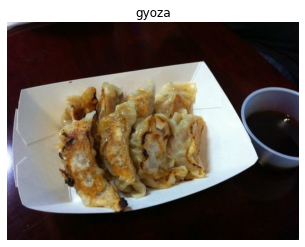

In [10]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [11]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
  image = tf.image.resize(image, size=[img_shape,img_shape])
  image = tf.cast(image, dtype=tf.float32)
  return image , label

In [12]:
# Preprocess single sample image and check the output
preprocessed_img = preprocess_img(image,label)[0]
print(f"Image before preprocessing:\n {image[:2]} \n Image shape: {image.shape} \n Image datatype: {image.dtype} \n")
print(f"Image after preprocessing: \n {preprocessed_img[:2]} \n Image shape: {preprocessed_img.shape} \n Image datatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[207 220 237]
  [207 220 237]
  [207 220 236]
  ...
  [ 10  11  13]
  [ 11  12  14]
  [ 12  13  15]]

 [[208 219 237]
  [207 220 236]
  [208 220 236]
  ...
  [  9  10  12]
  [ 10  11  13]
  [ 11  12  14]]] 
 Image shape: (382, 512, 3) 
 Image datatype: <dtype: 'uint8'> 

Image after preprocessing: 
 [[[207.12596  219.87404  236.77328 ]
  [206.75159  219.39891  235.39891 ]
  [206.33514  216.86098  232.36958 ]
  ...
  [ 10.433058  11.433058  13.433058]
  [  9.974804  10.974804  12.974804]
  [ 11.004499  12.004499  14.004499]]

 [[214.51498  225.25287  240.26627 ]
  [214.24043  223.17825  238.07462 ]
  [213.40561  221.28954  234.25638 ]
  ...
  [ 12.571472  13.571472  15.571472]
  [ 11.928558  12.928558  14.928558]
  [ 11.941964  12.941964  14.941964]]] 
 Image shape: (224, 224, 3) 
 Image datatype: <dtype: 'float32'>


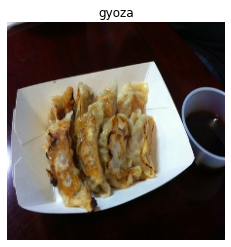

In [13]:
# We can still plot our preprocessed image as long as we 
# divide by 255 (for matplotlib capatibility)
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

## Data Preparation (Batch & Prefetch)

In [14]:
# Map preprocessing function to training data
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls= tf.data.AUTOTUNE)
# Shuffle batch and prefetch training data
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)

# Map preprocessing function to testing data
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls= tf.data.AUTOTUNE)
# Shuffle batch and prefetch training data
test_data = test_data.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)

In [15]:
train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Modelling Callback

In [16]:
# Create TensorBoard callback 
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [17]:
# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                      monitor = "val_accuracy",
                                                      save_best_only=True,
                                                      save_weight_only=True,
                                                      verbose=0)

## Setup Mixed Precision Training

In [18]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision 

In [19]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## EfficienetNetB0 Feature Extraction Model Using 

In [20]:
from tensorflow.keras import layers

# create base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape=input_shape, name='input_layer')
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation('softmax', dtype=tf.float32, name='softmax_float32')(x)
model = tf.keras.Model(inputs,outputs)

# Compile the model
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])



24274472/24274472 [==============================] - 2s 0us/step


In [21]:
# Check out our model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                             

In [22]:
# Check the layers in the base model and see what dtype policy they're using
for layer in model.layers[1].layers[:20]: # only check the first 20 layers to save output space
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block1a_project_activation False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False float32 <Policy "mixed_float16">
block2a_expand_activation False float32 <Policy "mixed_float16">
block2a_project_conv False float32 <Policy "mixed_float16">
block2a_project_bn False float32 <Policy "mixed_float16">
block2b_expand_conv False float32 <Policy "mixed_float16">
block2b_expand_bn False float32 <Policy "mixed_float16">
block2b_expand_activation False float32 <Policy "mixed_float16">
block2b_project_conv False float32 <Policy

## Fit the model 

In [23]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch = len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15*len(test_data)),
                                                     callbacks= [create_tensorboard_callback("training_logs",
                                                                                             "efficientnetv2b0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetv2b0_101_classes_all_data_feature_extract/20221123-091126
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.7453 - accuracy: 0.5778

2368/2368 [==============================] - 242s 95ms/step - loss: 1.7453 - accuracy: 0.5778 - val_loss: 1.1596 - val_accuracy: 0.6994
Epoch 2/3
2366/2368 [============================>.] - ETA: 0s - loss: 1.2119 - accuracy: 0.6865

2368/2368 [==============================] - 231s 97ms/step - loss: 1.2117 - accuracy: 0.6865 - val_loss: 1.0352 - val_accuracy: 0.7270
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.0641 - accuracy: 0.7234

2368/2368 [==============================] - 225s 94ms/step - loss: 1.0641 - accuracy: 0.7234 - val_loss: 0.9982 - val_accuracy: 0.7349


In [24]:
# Evaluate model (unsaved version) on whole test dataset
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 51s 65ms/step - loss: 0.9911 - accuracy: 0.7319


[0.991121768951416, 0.7318812012672424]

In [25]:
# Clone the model we created (this resets all weights)
cloned_model = tf.keras.models.clone_model(model)
cloned_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                             

In [26]:
# Where are our checkpoints stored?
checkpoint_path

'model_checkpoints/cp.ckpt'

In [27]:
# Load checkpointed weights into cloned_model
cloned_model.load_weights(checkpoint_path)

In [28]:
# Compile cloned_model (with same parameters as original model)
cloned_model.compile(loss="sparse_categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [29]:
# Evalaute cloned model with loaded weights (should be same score as trained model)
results_cloned_model_with_loaded_weights = cloned_model.evaluate(test_data)

790/790 [==============================] - 54s 64ms/step - loss: 0.9911 - accuracy: 0.7319


In [29]:
# Compare checkpoint weight before and after save
import numpy as np
assert np.isclose(results_feature_extract_model, results_cloned_model_with_loaded_weights).all()

## Save the whole model to file

In [30]:
save_dir = 'efficientnetb0_feature_extract_model_mixed_precision'
model.save(save_dir)

In [31]:
# Load model 
loaded_saved_model = tf.keras.models.load_model(save_dir)

In [32]:
# Check loaded model performance (this should be the same as results_feature_extract_model)
results_loaded_saved_model = loaded_saved_model.evaluate(test_data)
results_loaded_saved_model

790/790 [==============================] - 55s 66ms/step - loss: 0.9911 - accuracy: 0.7319


[0.991121768951416, 0.7318812012672424]

## Preparing fine tuning layer model

In [33]:
# Are any of the layers in our model frozen?
for layer in loaded_saved_model.layers:
    layer.trainable = True # set all layers to trainable
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # make sure loaded model is using mixed precision dtype_policy ("mixed_float16")

input_layer True float32 <Policy "float32">
efficientnetv2-b0 True float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


## Callbacks

In [34]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [35]:
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

In [36]:
# Compile the model
loaded_saved_model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
                        optimizer=tf.keras.optimizers.Adam(0.0001), # 10x lower learning rate than the default
                        metrics=["accuracy"])

In [37]:
# Start to fine-tune (all layers)
history_101_food_classes_all_data_fine_tune = loaded_saved_model.fit(train_data,
                                                        epochs=100, # fine-tune for a maximum of 100 epochs
                                                        steps_per_epoch=len(train_data),
                                                        validation_data=test_data,
                                                        validation_steps=int(0.15 * len(test_data)), # validation during training on 15% of test data
                                                        callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning"), # track the model training logs
                                                                   model_checkpoint, # save only the best model during training
                                                                   early_stopping, # stop model after X epochs of no improvements
                                                                   reduce_lr]) # reduce the learning rate after X epochs of no improvements

Saving TensorBoard log files to: training_logs/efficientb0_101_classes_all_data_fine_tuning/20221123-094304
Epoch 1/100
2368/2368 [==============================] - ETA: 0s - loss: 0.8710 - accuracy: 0.7660

2368/2368 [==============================] - 363s 145ms/step - loss: 0.8710 - accuracy: 0.7660 - val_loss: 0.6966 - val_accuracy: 0.8069 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - ETA: 0s - loss: 0.5123 - accuracy: 0.8580

2368/2368 [==============================] - 328s 138ms/step - loss: 0.5123 - accuracy: 0.8580 - val_loss: 0.6891 - val_accuracy: 0.8099 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - 280s 117ms/step - loss: 0.2653 - accuracy: 0.9233 - val_loss: 0.7906 - val_accuracy: 0.8075 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - ETA: 0s - loss: 0.1321 - accuracy: 0.9601
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 279s 117ms/step - loss: 0.1321 - accuracy: 0.9601 - val_loss: 0.9055 - val_accuracy: 0.7932 - lr: 1.0000e-04
Epoch 5/100
2368/2368 [==============================] - 280s 118ms/step - loss: 0.0266 - accuracy: 0.9938 - val_loss: 0.9567 - val_accuracy: 0.8141 - lr: 2.0000e-05


## Visualize training result on TensorBoard

In [39]:
# Upload experiment results to TensorBoard (uncomment to run)
!tensorboard dev upload --logdir ./training_logs \
  --name "Fine-tuning EfficientNetB0 on all Food101 Data" \
  --description "Training results for fine-tuning EfficientNetB0 on Food101 Data with learning rate 0.0001" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./training_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=Qpp1YUwSRfdmhCz4Hn9gGiuUO04LkN&prompt=consent&access_type=offli

View your TensorBoard at https://tensorboard.dev/experiment/XtvZXv3fR5OKwyy0bRz5jA/